### Priprava podatkov za obdelavo

In [2]:
from Classes import Data

data = Data()

### Računanje št. nesreč letal skozi leta

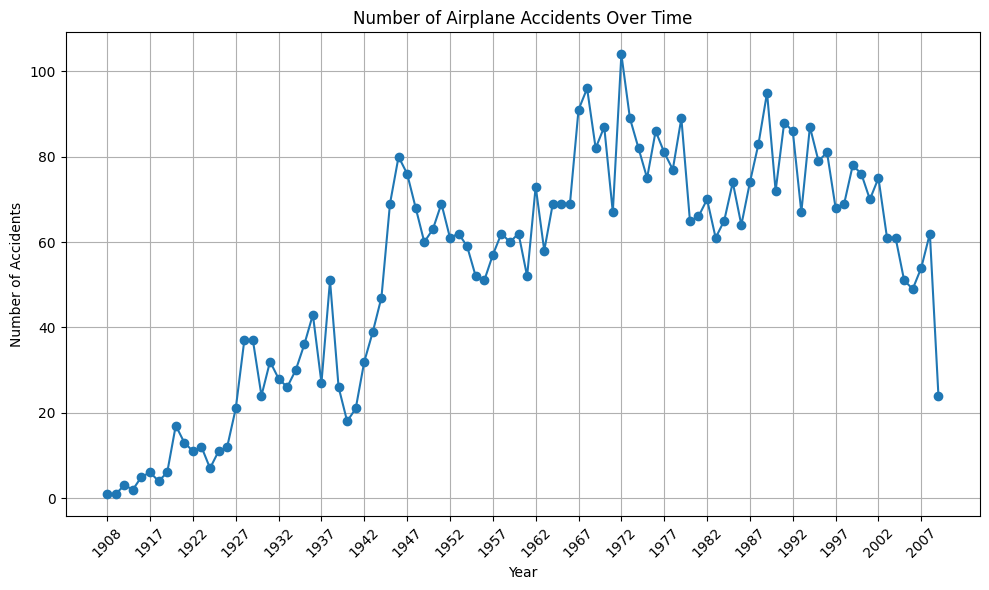

In [3]:
data.crashes_over_time() #mau niha pa to

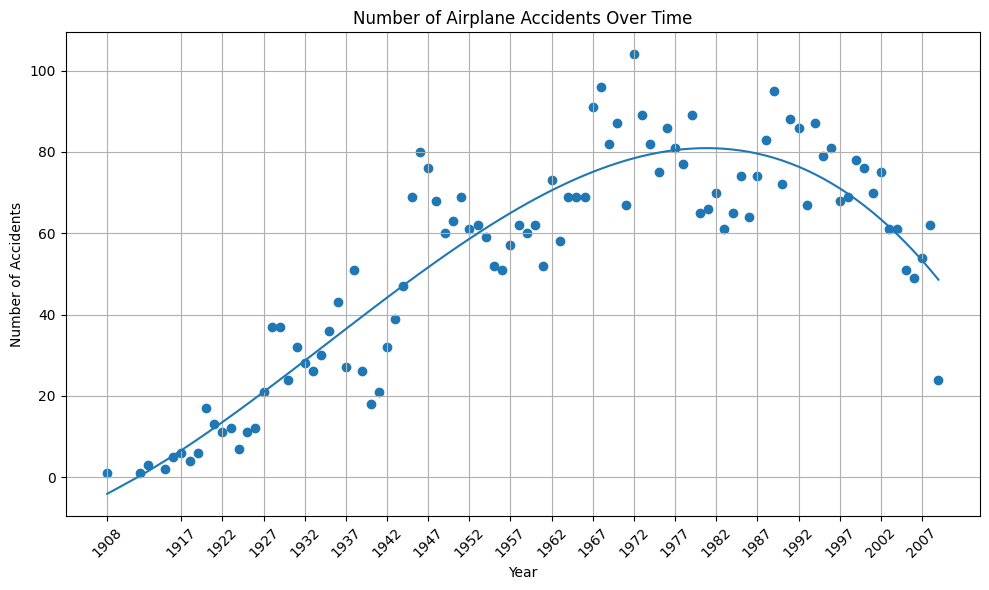

In [4]:
data.crashes_over_time_regression()

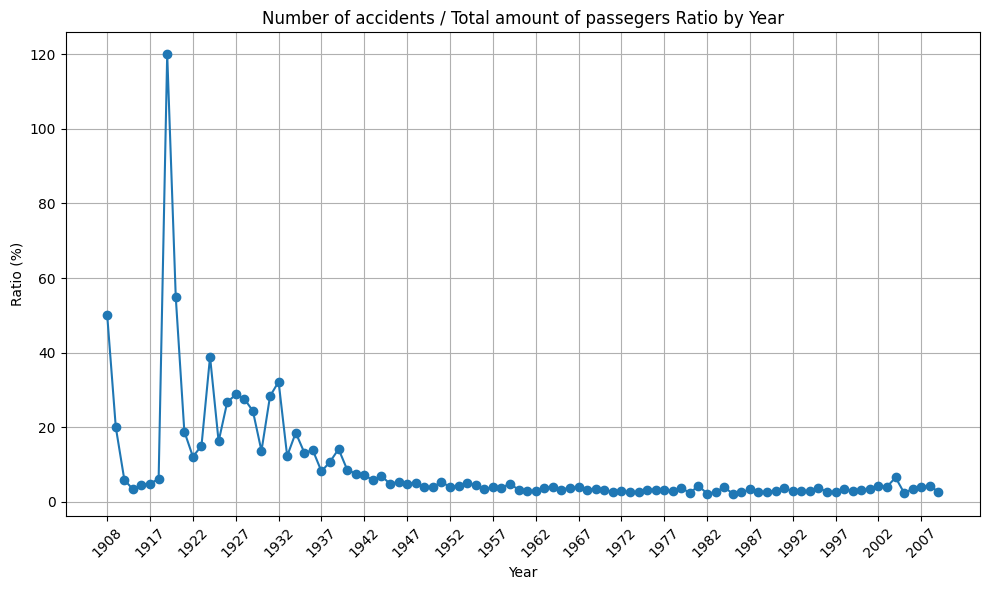

In [5]:
data.ratio_over_time()

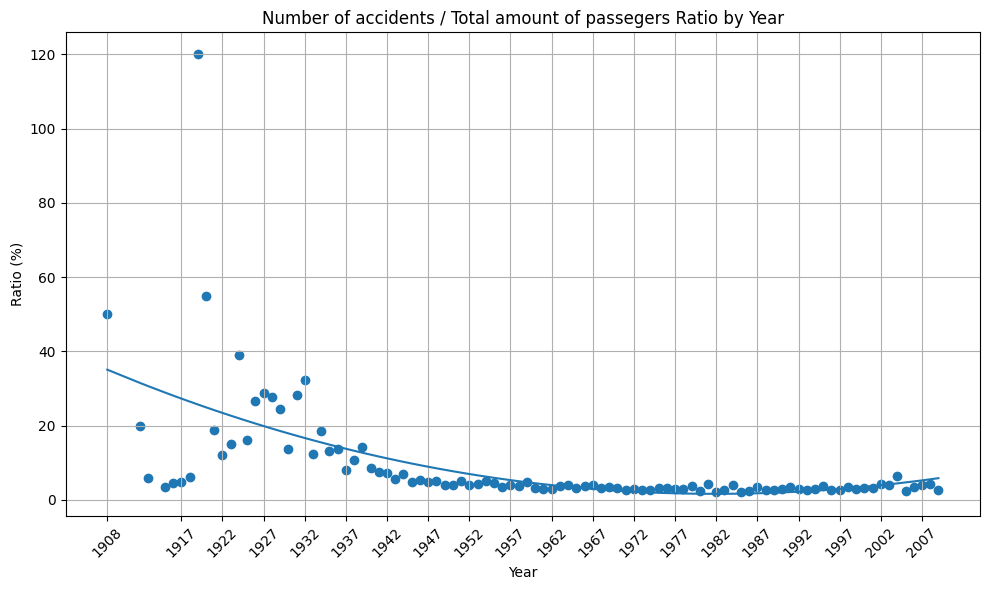

In [6]:
data.ratio_over_time_regression()

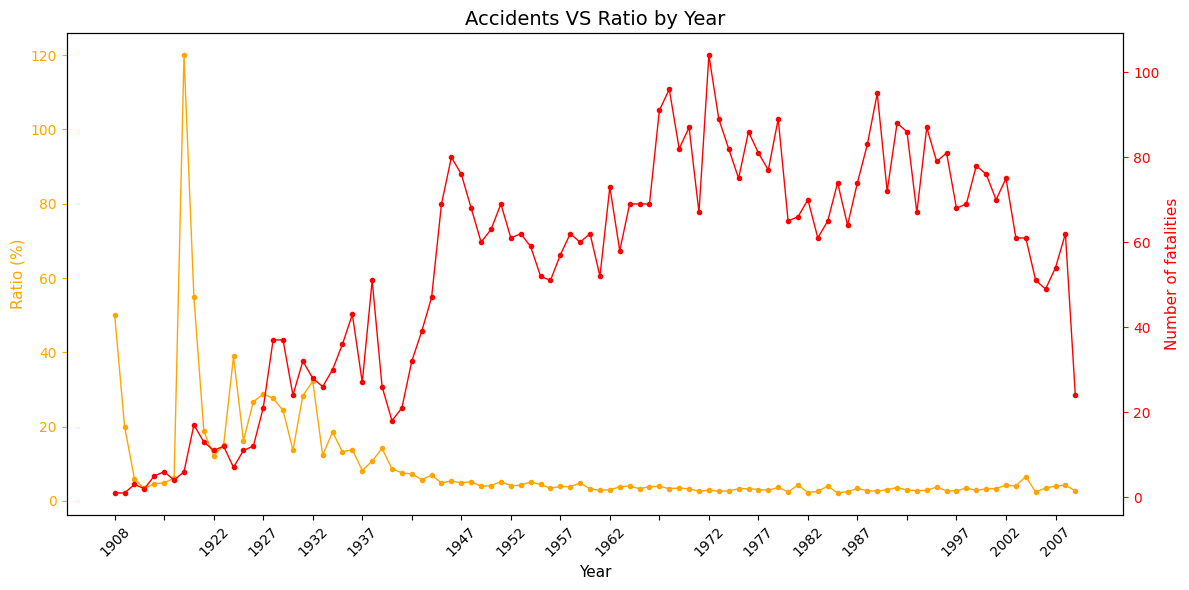

In [7]:
data.fatilities_vs_ratio()

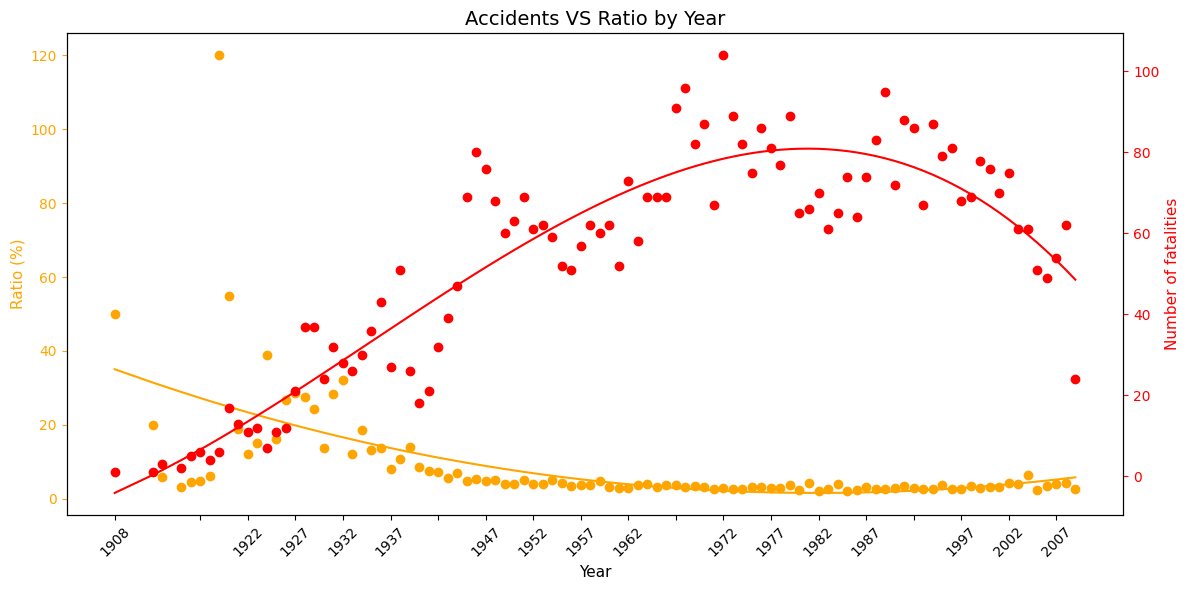

In [8]:
data.fatilities_vs_ratio_regression()

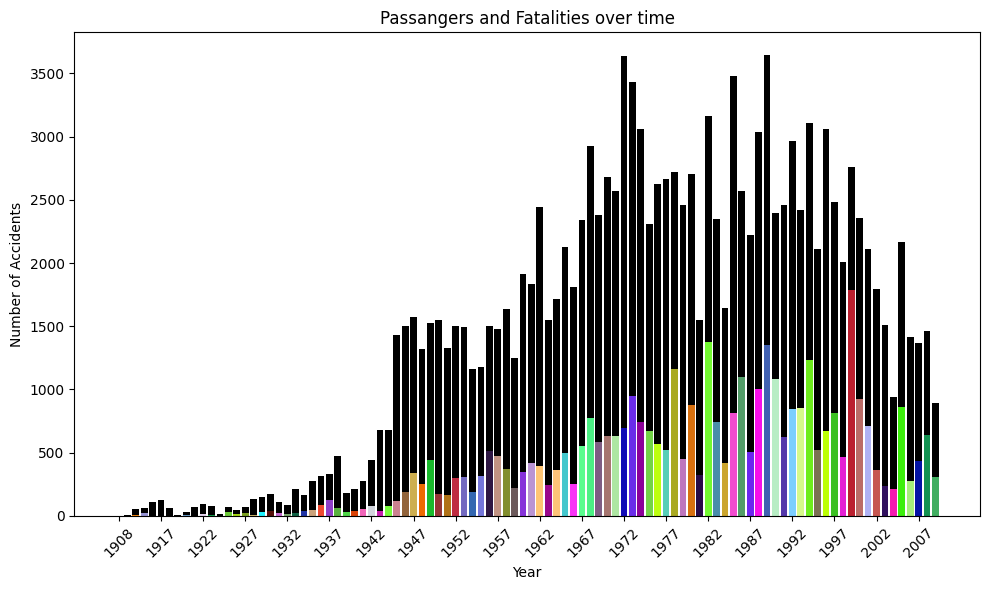

In [9]:
data.passanger_and_fatalities_over_time()

Douglas DC-3 : 334
de Havilland Canada DHC-6 Twin Otter 300 : 81
Douglas C-47A : 74
Douglas C-47 : 62
Douglas DC-4 : 40
Yakovlev YAK-40 : 37
Antonov AN-26 : 36
Junkers JU-52/3m : 32
Douglas C-47B : 29
De Havilland DH-4 : 28


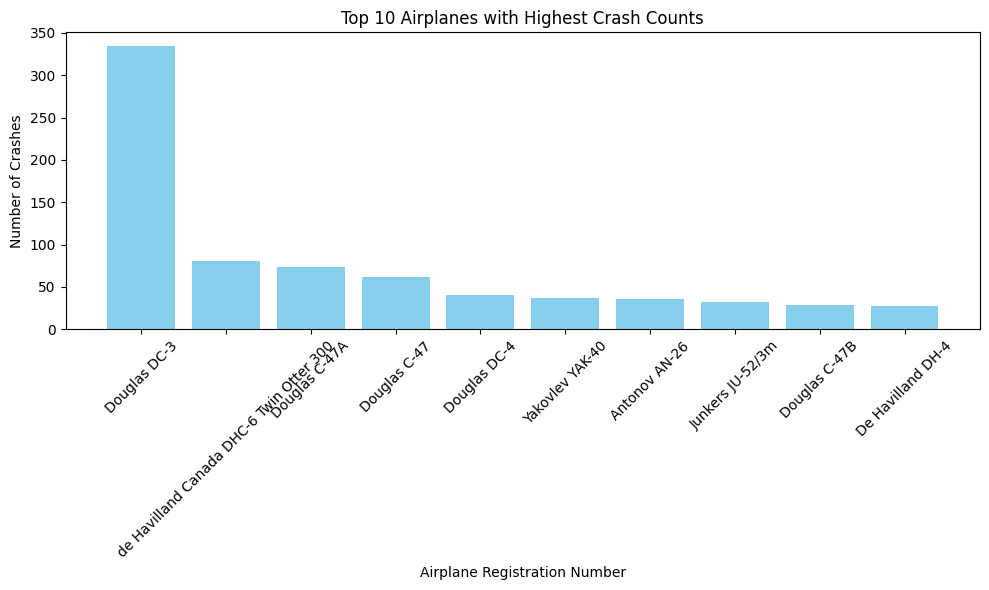

In [10]:
data.highest_crash_counts() #En čas edino prevozniško letalo. 

209


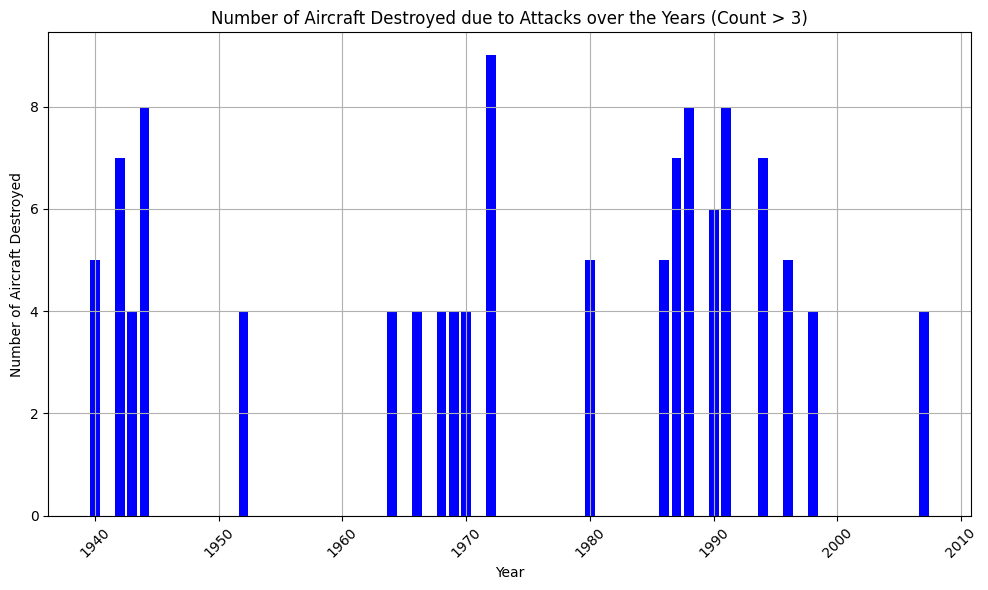

In [11]:
import matplotlib.pyplot as plt
import numpy as np


def unicena_letala():
    unicena = data.extract_data_from_summary(["shoot", "shot", "attack"], ["overshoot", "undershoot"], "Summary")
    print(len(unicena))
    years, counts = np.unique([entry['Date'][-4:] for entry in unicena], return_counts=True)

    years_filtered = years[counts > 3]
    counts_filtered = counts[counts > 3]

    """for year,count in zip(years,counts):
        if(count>3):
            print(year,count)"""

    plt.figure(figsize=(10, 6))
    plt.bar(years_filtered.astype(int), counts_filtered, color='blue')
    plt.xlabel('Year')
    plt.ylabel('Number of Aircraft Destroyed')
    plt.title('Number of Aircraft Destroyed due to Attacks over the Years (Count > 3)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


unicena_letala() 
#Lahko izpišemo še kraj
#1940 - 2 svetovna vojna
#1960 - Vietnamska vojna
#1980 - Falklandska vojna
#1990 - Sovjetska zveza, Jugoslavija...

**Faulty design**

In [12]:
extracted = data.extract_data_from_summary(["faulty design", "design flaw", "design deficiencies"], [], "Summary")
print(len(extracted))


16


**Water**

In [13]:
extracted = data.extract_data_from_summary(["ocean", "water", "swamp", "sea", "river"], [], "Summary")
print(len(extracted))


617


**Low fuel**

In [14]:
extracted = data.extract_data_from_summary(["low fuel", "fuel exhaustion", "ran out of fuel", "running out of fuel"], [], "Summary")
print(len(extracted))


66


**Birds**

In [15]:
extracted = data.extract_data_from_summary(["bird", "geese", "flock"], [], "Summary")
print(len(extracted))

12


### Uspešnost letalskih podjetij glede na število mrtvih, število potnikov in število letov

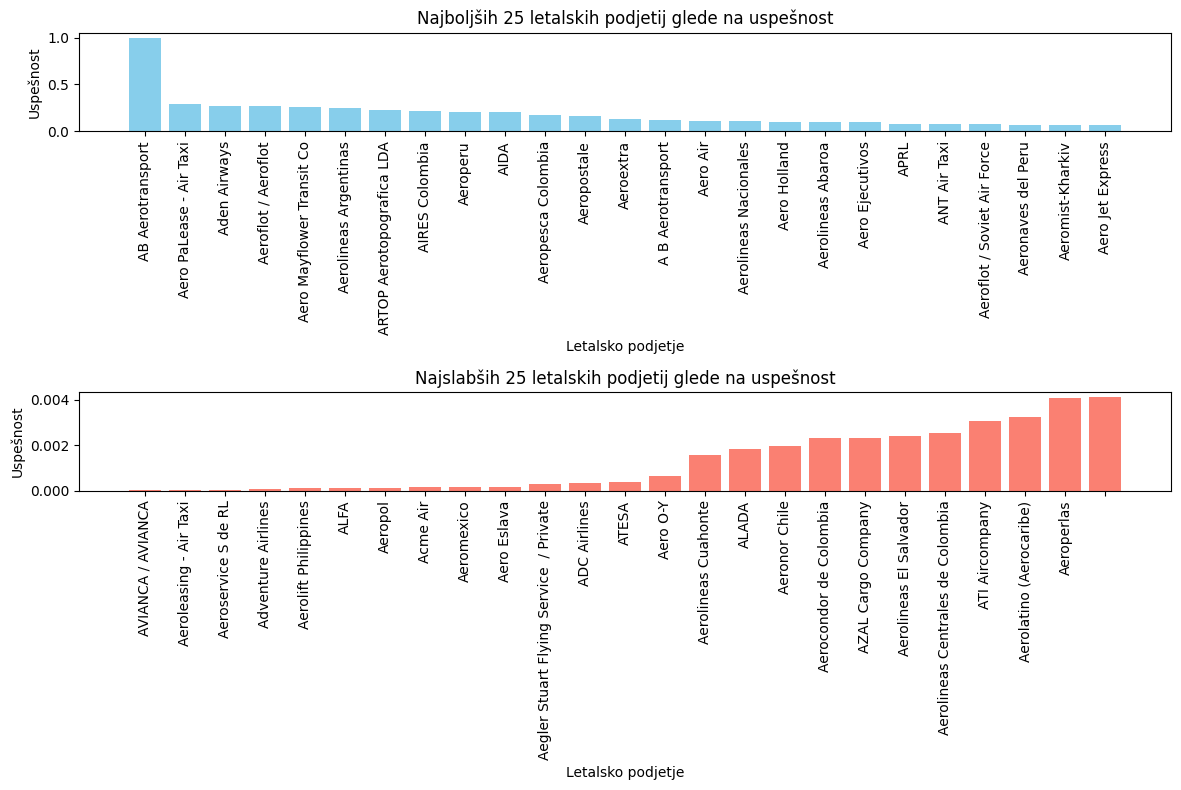

In [16]:
data.operator_performance() # Še enkrat v ChatGPT ali pa razmislimo

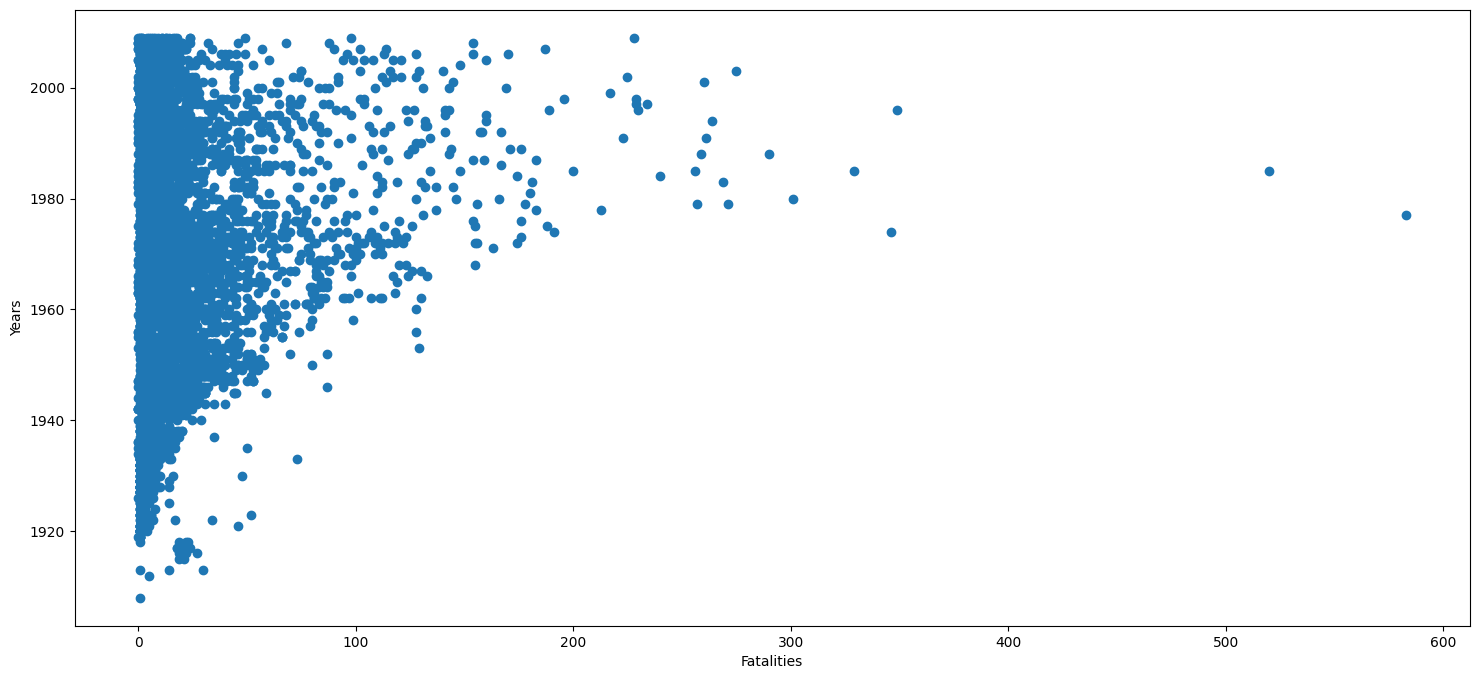

In [17]:
data.deaths_over_time()

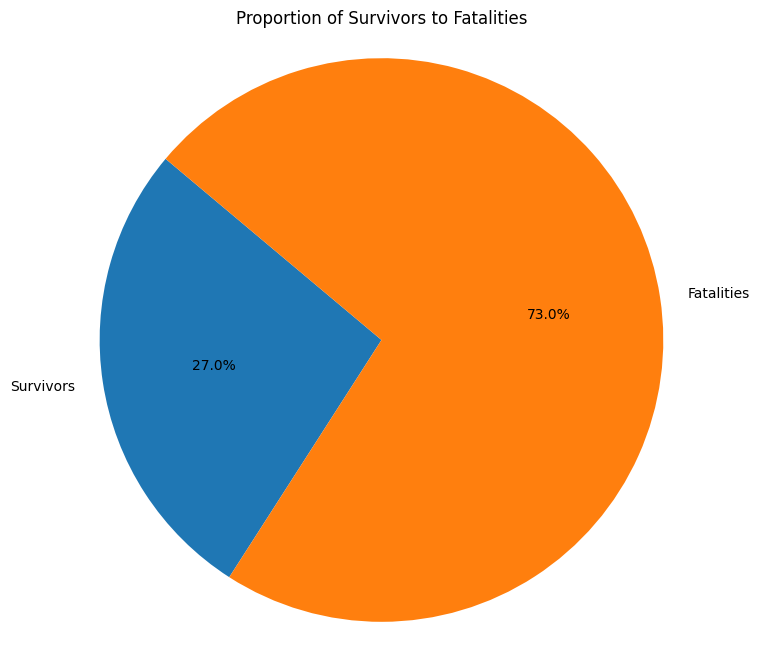

In [18]:
data.ratio_between_aboard_fatal()

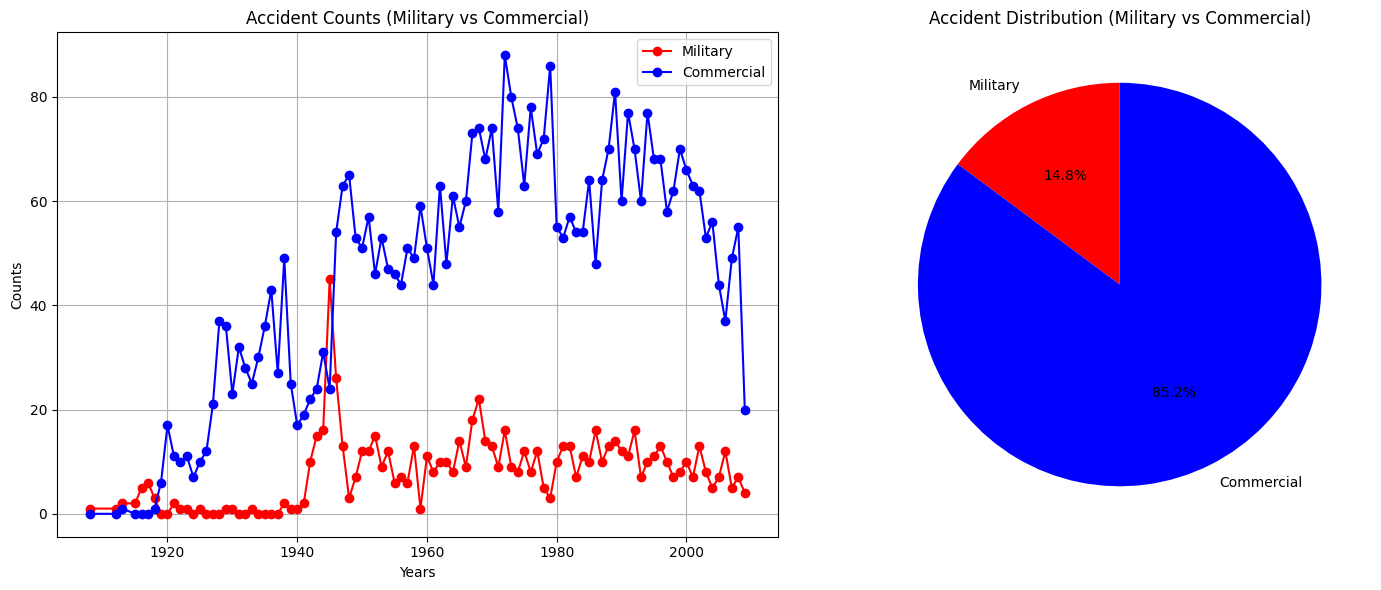

In [19]:
data.type_of_flights()

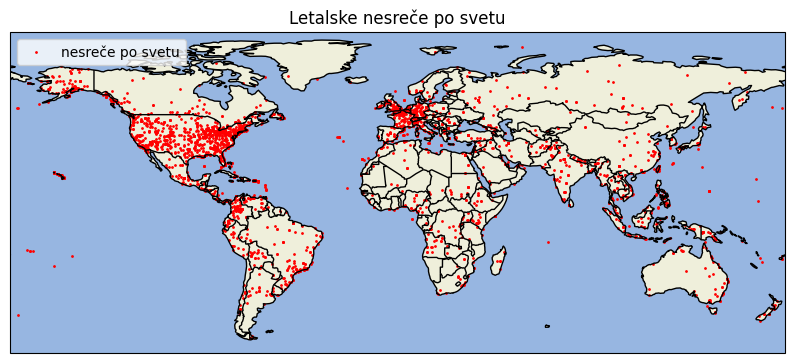

In [18]:
data.crash_locations_on_map()

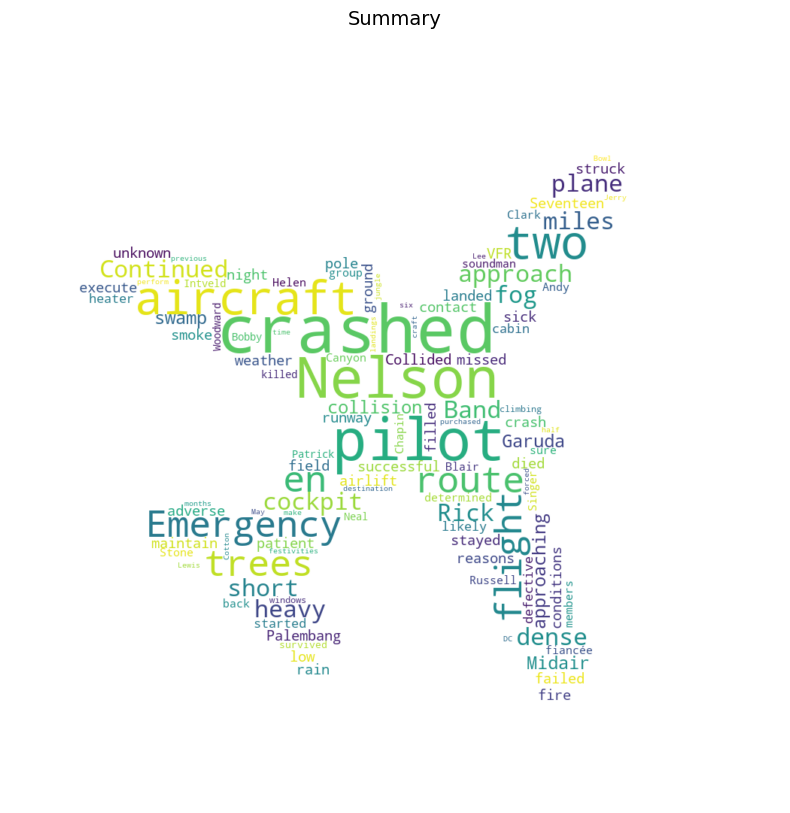

In [19]:
data.wordcloud('Summary')

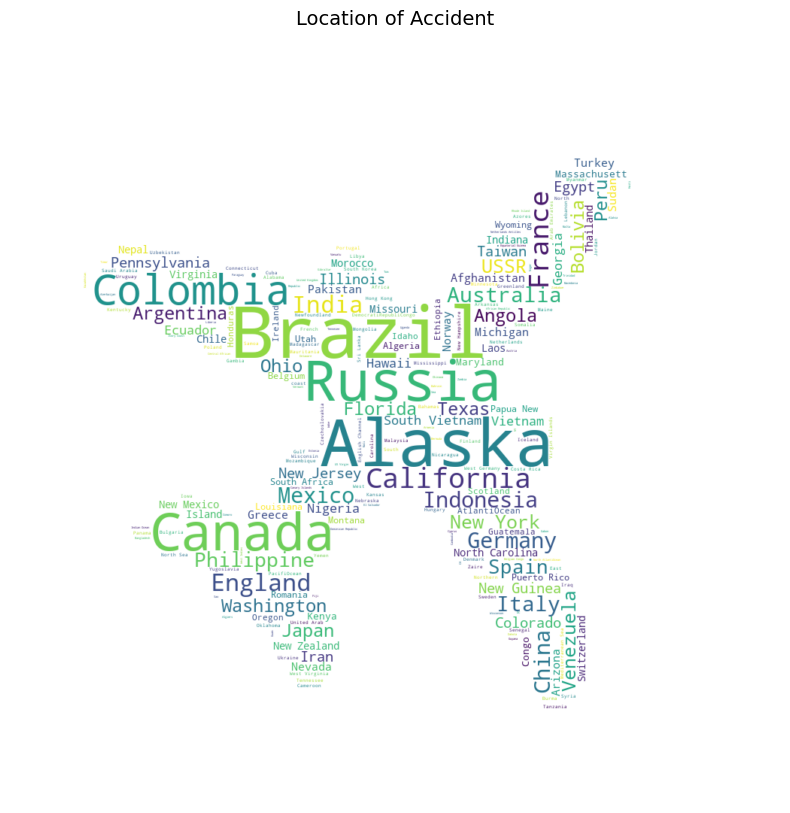

In [20]:
data.countrycloud('Location')

In [21]:
top_operators = data.top_operators('Operator', 3)
print("Operatorji z največ nesrečami:")
for operator, count in top_operators:
    print(f"{operator}: {count} nesreč")

Operatorji z največ nesrečami:
Aeroflot: 179 nesreč
Military - U.S. Air Force: 176 nesreč
Air France: 70 nesreč


Zanimivo je da je največ nesreč bilo pri Ruskemu operatorju in sicer Aeroflot. Pa raziscimo malo...

Narisimo graf, ki bo prikazoval st. nesrec operatorja Aeroflot vsako leto.

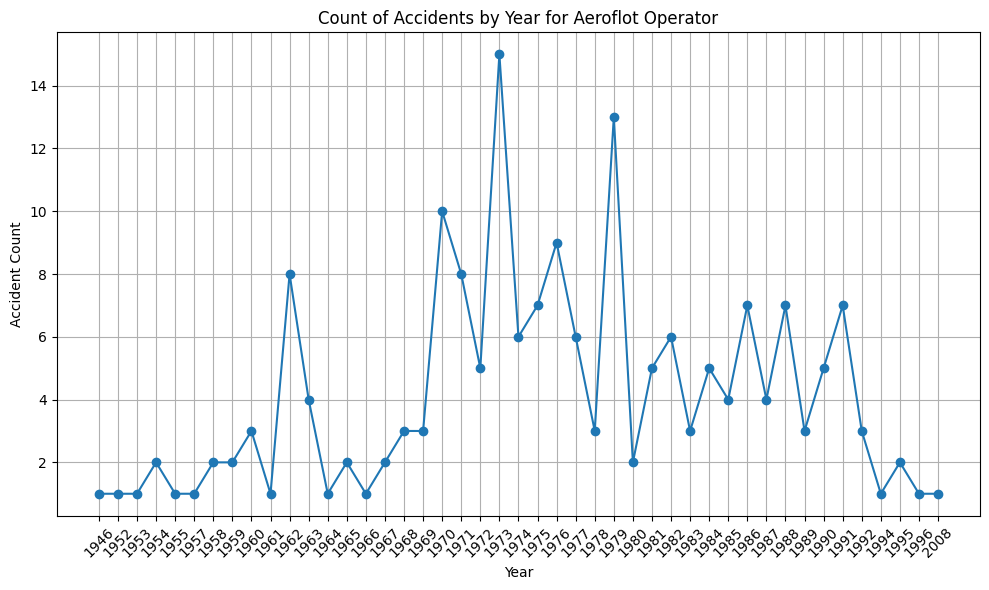

In [22]:
data.count_of_accidents_by_year_operator()

Opazimo da je prišlo do veliko nesreč med letom 1970 in 1990. Po krajšem brskanju na internetu imamo celo wikipedia članek na to temo.
https://en.wikipedia.org/wiki/Aeroflot_accidents_and_incidents_in_the_1970s


Cluster 2:
The aircraft crashed 20 kilometres (12 mi) southeast of Toguchina, after it collided with a weather balloon while en route a domestic scheduled Novosibirsk–Krasnoyarsk passenger service as Flight 1661.
During the descent to Saratov the aircraft flew through cloud, during which ice built up on the airframe. The pilot attempted to increase engine power to correct the decrease in speed, but this failed. The aircraft lost control and entered a high rate of descent and crashed 13 km (8.1 mi) from the runway. The aircraft was operating a domestic scheduled Sverdlovsk–Ufa–Saratov passenger service as Flight 2174.
Crashed while en route its first leg into a 750-metre-high (2,460 ft) mountain. The aircraft was operating an international scheduled Luanda–Malabo–Kinshasa–Tripoli–Moscow passenger service as Flight 418. The cause was not determined, but radar failure was suspected.
Crashed in poor weather.
Mid-air collision with a Mi-8T. The aircraft was operating a domestic scheduled Kh

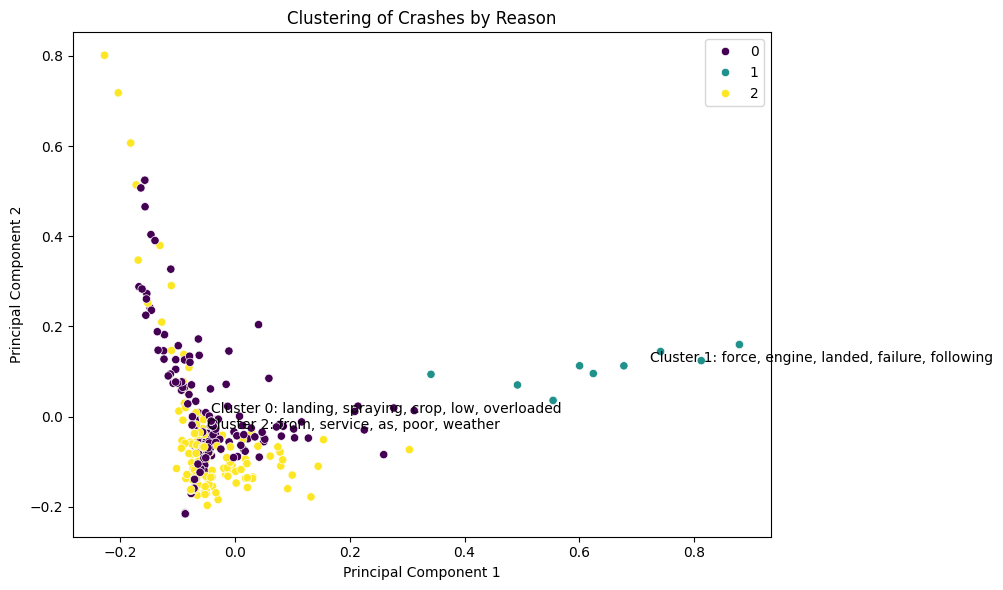

In [23]:
data.cluster_crashes_by_reason()